<a href="https://colab.research.google.com/github/RinkiDS/ANN-Implementation/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [358]:
import pandas as pd
import numpy as np

In [359]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [360]:
df=pd.read_csv("/content/drive/MyDrive/data/Titanic dataset (1).csv")

In [361]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [362]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [363]:
df1=df.drop(["PassengerId","Name","Ticket"],axis=1)

In [364]:
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [365]:
df.shape

(891, 12)

In [366]:
df1.shape

(891, 9)

#encoding for categorical columns in data

In [367]:
df1 = pd.get_dummies(df1, columns = ['Sex','Pclass'])

#finding the NA values in data

In [368]:
df1.isna().sum()

Survived        0
Age           177
SibSp           0
Parch           0
Fare            0
Cabin         687
Embarked        2
Sex_female      0
Sex_male        0
Pclass_1        0
Pclass_2        0
Pclass_3        0
dtype: int64

In [369]:
import seaborn as sns

#finding the outlier in data through box plot

<Axes: >

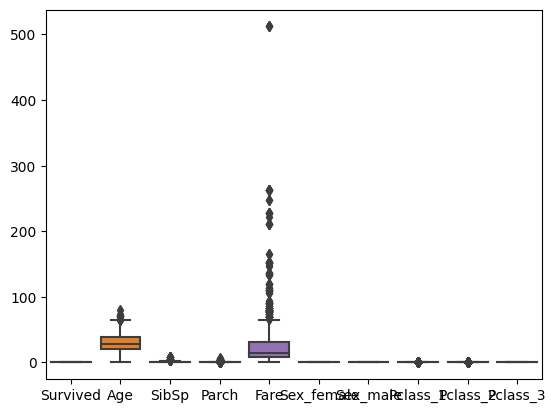

In [370]:
sns.boxplot(data=df1)

#Question 1 :Perform missing value and outlier treatments on the columns

#Handling NAN value in Age with mean

#Method1

In [371]:
# import modules
from sklearn.impute import SimpleImputer
import numpy as nmp

In [372]:
print("Before Imputer:\n", df1.isna().sum())

# defining the imputer
imputer = SimpleImputer(missing_values = nmp.nan,
                        strategy='mean')

# transform the dataset
df1["Age"] = imputer.fit_transform(df1[["Age"]])

print("After Imputer:\n", df1.isna().sum())




Before Imputer:
 Survived        0
Age           177
SibSp           0
Parch           0
Fare            0
Cabin         687
Embarked        2
Sex_female      0
Sex_male        0
Pclass_1        0
Pclass_2        0
Pclass_3        0
dtype: int64
After Imputer:
 Survived        0
Age             0
SibSp           0
Parch           0
Fare            0
Cabin         687
Embarked        2
Sex_female      0
Sex_male        0
Pclass_1        0
Pclass_2        0
Pclass_3        0
dtype: int64


In [373]:
df1.shape

(891, 12)

#Handling NAN value in Category column Cabin with mode

In [374]:
unique_cabin=df1["Cabin"].unique().size

In [375]:
print("Before Replacing:", df1["Cabin"].isna().sum())

Before Replacing: 687


In [376]:
df1["Cabin"] = df1["Cabin"].fillna(df1["Cabin"].mode()[0])

In [377]:
print("After Replacing:", df1["Cabin"].isna().sum())

After Replacing: 0


#getting rid of cabin from the features

In [378]:
df1=df1.drop(columns=["Cabin"],axis=1)

#Handling NAN value in Embarked with mode and converting to int

In [379]:
df1['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [380]:
 df1['Embarked'] = df1['Embarked'].fillna(df1["Embarked"].mode()[0])

In [381]:
df1['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [382]:
ports = {"S": 0, "C": 1, "Q": 2}
df1['Embarked'] = df1['Embarked'].map(ports)

In [383]:
df1['Fare'] = df1['Fare'].astype(int)

Outlier Treatement in Age Column

Before Outlier Treatment


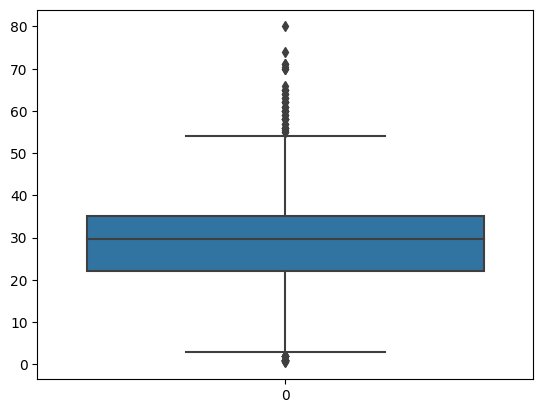

In [384]:
print("Before Outlier Treatment")
plt1=sns.boxplot(data=df1["Age"])

code to replace outliers in Age column

In [385]:
Q1 = df1['Age'].quantile(0.25)
Q3 = df1['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_whisker=Q1 - 1.5*IQR
upper_whisker=Q3 +1.5*IQR
print(upper_whisker)
print(lower_whisker)
df1['Age']=np.where(df1['Age']>upper_whisker,upper_whisker,np.where(df1['Age']<lower_whisker,lower_whisker,df1['Age']))


54.5
2.5


After outlier Treatment


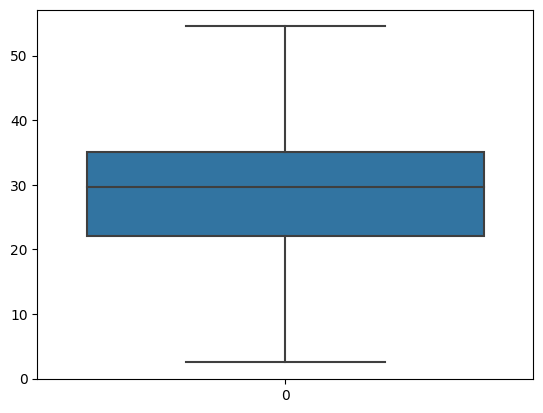

In [386]:
print("After outlier Treatment")
plt2=sns.boxplot(data=df1["Age"])

In [387]:
df1.shape

(891, 11)

# Question 2 Perform logistic regression and obtain the confusion matrix together with the accuracy value –

In [388]:
df1.head()

,Survived,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,0,22.0,1,0,7,0,0,1,0,0,1
1,1,38.0,1,0,71,1,1,0,1,0,0
2,1,26.0,0,0,7,0,1,0,0,0,1
3,1,35.0,1,0,53,0,1,0,1,0,0
4,0,35.0,0,0,8,0,0,1,0,0,1


Separating Dependent and independent features from the data

In [389]:
X= df1.drop("Survived", axis=1)
Y = df1["Survived"]
print(X.size)
print(Y.size)

8910
891


Splitting the test and train data

In [390]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.326)
print("Test data size  after split is ",y_test.size)
print("Train data size  after split is ",y_train.size)

Test data size  after split is  291
Train data size  after split is  600


#Creating Models for the data
# Model 1: Logistic Regression

In [391]:
from sklearn.linear_model import LogisticRegression

In [392]:
log_model = LogisticRegression(solver='lbfgs', max_iter=1000)
log_model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

Predicting from Logistic Regression model and calculating the accuracy of prediction

In [393]:
#acc_log_train = round(log_model.score(x_train, y_train) * 100, 2)
#print(f"The Training Logistic Regression Acccuracy is :{acc_log_train } %")
acc_log_test = round(log_model.score(x_test, y_test) * 100, 2)
print(f"The Testing Logistic Regression Acccuracy is :{acc_log_test } %")

The Testing Logistic Regression Acccuracy is :80.07 %


Confusion Matrix and Classification Reports

In [394]:
from sklearn  import metrics
from sklearn.metrics  import classification_report

In [395]:
Y_prediction=log_model.predict(x_test)

In [396]:
cm = metrics.confusion_matrix(y_test, Y_prediction)
print(cm)

[[155  25]
 [ 33  78]]


In [397]:
cm = metrics.classification_report(y_test, Y_prediction)
print(cm)

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       180
           1       0.76      0.70      0.73       111

    accuracy                           0.80       291
   macro avg       0.79      0.78      0.79       291
weighted avg       0.80      0.80      0.80       291



#Question 3 :Build random forests model and obtain the confusion matrix together with the accuracy value

# Model 2 :RandomForestClassifier

In [398]:
from sklearn.ensemble import RandomForestClassifier

Random Forest Model with n_estimator=100

In [399]:
random_forest_100 = RandomForestClassifier(n_estimators=100)
random_forest_100.fit(x_train, y_train)

RandomForestClassifier()

Random Forest Model with n_estimator=150

In [400]:
random_forest_150 = RandomForestClassifier(n_estimators=150)
random_forest_150.fit(x_train, y_train)

RandomForestClassifier(n_estimators=150)

In [401]:
##acc_random_forest_train = round(random_forest.score(x_train, y_train) * 100, 2)
##print(f"The Training RandomForestClassifier Acccuracy is :{acc_random_forest_train } %")
acc_random_forest_test = round(random_forest_100.score(x_test, y_test) * 100, 2)
print(f"The Testing RandomForestClassifier Acccuracy for n=100 is :{acc_random_forest_test } %")
acc_random_forest_test = round(random_forest_150.score(x_test, y_test) * 100, 2)
print(f"The Testing RandomForestClassifier Acccuracy for n=150 is :{acc_random_forest_test } %")

The Testing RandomForestClassifier Acccuracy for n=100 is :82.13 %
The Testing RandomForestClassifier Acccuracy for n=150 is :80.41 %


As seen increasing the estimators changes the accuracy

Confusion Matrix and Classification Reports

In [402]:
Y_prediction=random_forest_100.predict(x_test)

In [403]:
cm = metrics.confusion_matrix(y_test, Y_prediction)
print(cm)

[[156  24]
 [ 28  83]]


In [404]:
cm = metrics.classification_report(y_test, Y_prediction)
print(cm)

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       180
           1       0.78      0.75      0.76       111

    accuracy                           0.82       291
   macro avg       0.81      0.81      0.81       291
weighted avg       0.82      0.82      0.82       291



# Model 3 :XgBoostClassifier

In [405]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

XGBoost presents the DMatrix class, which optimizes speed and memory for effective dataset storage. To use the XGBoost API, datasets must be converted to this format

In [406]:
xgb_train = xgb.DMatrix(x_train, y_train, enable_categorical=True)
xgb_test = xgb.DMatrix(x_test, y_test, enable_categorical=True)

In [407]:
n=50
params = {
    'objective': 'binary:logistic',
    'max_depth': 2,
    'learning_rate': 0.1,
}

xg_boost_model = xgb.train(params=params,dtrain=xgb_train,num_boost_round=n)


In [408]:
preds = xg_boost_model.predict(xgb_test)
preds = preds.astype(int)
accuracy_xgboost= accuracy_score(y_test,preds)*100
print('Accuracy of the XGBOOST model is:',accuracy_xgboost)

Accuracy of the XGBOOST model is: 61.855670103092784


In [409]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','Random Forest','XGBoost'],'Score': [acc_log_test, acc_random_forest_test,accuracy_xgboost]})
result_df = results.sort_values(by='Score', ascending=False)
result_df

,Model,Score
1,Random Forest,80.41000
0,Logistic Regression,80.07000
2,XGBoost,61.85567
